In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [8]:
class TDistribution:
    def __init__(self, df):
        self.df = df

    def pdf(self, x):
        coef = np.math.gamma((self.df + 1) / 2) / (np.sqrt(self.df * np.pi) * np.math.gamma(self.df / 2))
        return coef * (1 + (x ** 2) / self.df) ** (-(self.df + 1) / 2)

    def cdf(self, x):
        return np.array([self._cdf_single(val) for val in x])

    def _cdf_single(self, x):
        return 0.5 * (1 + np.math.erf(x / np.sqrt(2)))

def plot_pdf(x_values, pdf1, pdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf1, label=label1, color='blue')
    plt.plot(x_values, pdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, cdf1, label=label1, color='blue')
    plt.plot(x_values, cdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pdf_scipy, pdf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf_scipy, label=label1, color='blue', linestyle='--')
    plt.plot(x_values, pdf_custom, label=label2, color='orange')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
# Parameters for two t-distributions (degrees of freedom ν)
df1 = 5
df2 = 10

# Generate x values
x_t = np.linspace(-5, 5, 1000)

# Calculate PDF and CDF using scipy
pdf_t_1_scipy = t.pdf(x_t, df1)
pdf_t_2_scipy = t.pdf(x_t, df2)
cdf_t_1_scipy = t.cdf(x_t, df1)
cdf_t_2_scipy = t.cdf(x_t, df2)

# Create instances of TDistribution
t_dist_1 = TDistribution(df1)
t_dist_2 = TDistribution(df2)

# Calculate PDF and CDF using custom class
pdf_t_1_custom = np.array([t_dist_1.pdf(x) for x in x_t])
pdf_t_2_custom = np.array([t_dist_2.pdf(x) for x in x_t])

cdf_t_1_custom = t_dist_1.cdf(x_t)
cdf_t_2_custom = t_dist_2.cdf(x_t)

/tmp/ipykernel_1387716/2237570317.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef = np.math.gamma((self.df + 1) / 2) / (np.sqrt(self.df * np.pi) * np.math.gamma(self.df / 2))
/tmp/ipykernel_1387716/2237570317.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return 0.5 * (1 + np.math.erf(x / np.sqrt(2)))


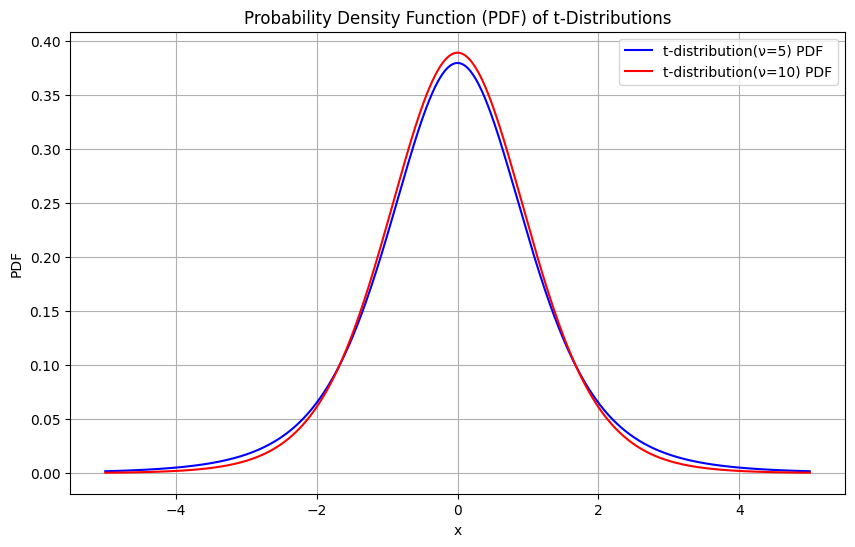

In [10]:
# Plot 1: PDF of t-Distributions (Original)
plot_pdf(x_t, pdf_t_1_scipy, pdf_t_2_scipy,
         label1=f"t-distribution(ν={df1}) PDF", 
         label2=f"t-distribution(ν={df2}) PDF",
         title="Probability Density Function (PDF) of t-Distributions")

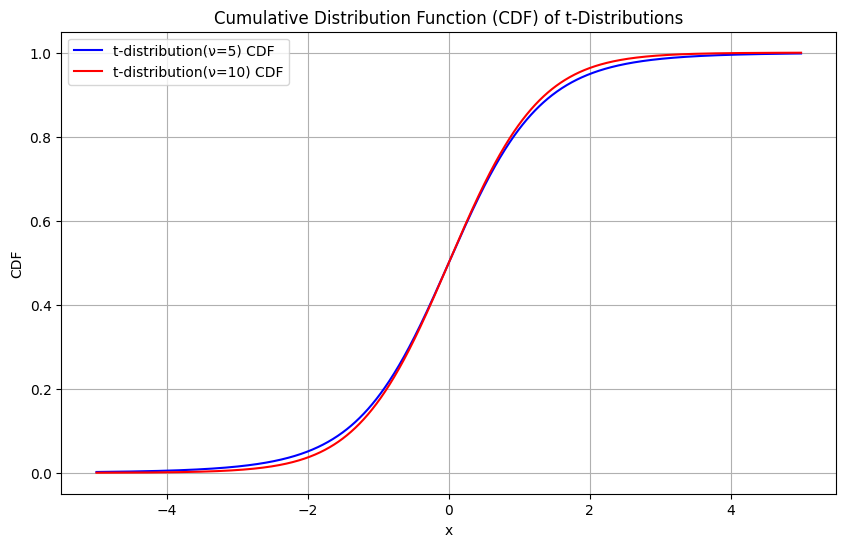

In [11]:
# Plot 2: CDF of t-Distributions (Original)
plot_cdf(x_t, cdf_t_1_scipy, cdf_t_2_scipy, 
         label1=f"t-distribution(ν={df1}) CDF", 
         label2=f"t-distribution(ν={df2}) CDF", 
         title="Cumulative Distribution Function (CDF) of t-Distributions")

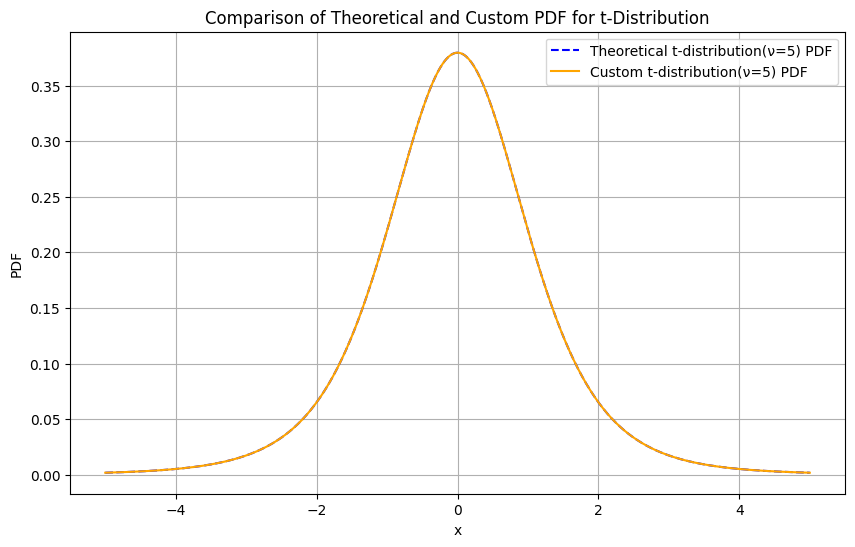

In [12]:
# Plot 3: Comparison of Theoretical and Custom PDFs
plot_comparison(x_t, pdf_t_1_scipy, pdf_t_1_custom, 
                label1=f'Theoretical t-distribution(ν={df1}) PDF', 
                label2=f'Custom t-distribution(ν={df1}) PDF', 
                title='Comparison of Theoretical and Custom PDF for t-Distribution')